In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# Reading csv file
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Preparing the data

In [4]:
# Data cleaning for "Size" column
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)
# Data cleaning for "Installs" column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))
# Data cleaning for "Price" column
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())
# Row 10472 removed due to missing value of Category
df.drop(df.index[10472], inplace=True)
# Row [7312,8266] removed due to "Unrated" value in Content Rating
df.drop(df.index[[7312,8266]], inplace=True)

In [5]:
# Sort by "Category"
df.sort_values("Category", inplace = True)

In [6]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
df["Category NUM"] = lb_make.fit_transform(df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

In [7]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
# Rounding the mean value to 1 decimal place
df['Rating'].round(1)
df.dropna(axis=0, inplace=True)

In [8]:
# Change datatype
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])
df['Size'] = pd.to_numeric(df['Size'])

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating NUM,Category NUM
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2,100000,Free,0.0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up,1,0
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up,1,0
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11.0,10000,Free,0.0,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up,1,0
39,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.0,591,9.4,500000,Free,0.0,Everyone,Art & Design,"March 31, 2018",1,4.0 and up,1,0


In [10]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews                 int64
Size                  float64
Installs                int64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Last Updated           object
Current Ver            object
Android Ver            object
Content Rating NUM      int32
Category NUM            int32
dtype: object

In [11]:
df.Category.value_counts()

FAMILY                 1828
GAME                   1015
TOOLS                   736
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         353
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     196
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       81
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           61
WEATHER                  57
EVENTS                   57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

<AxesSubplot:>

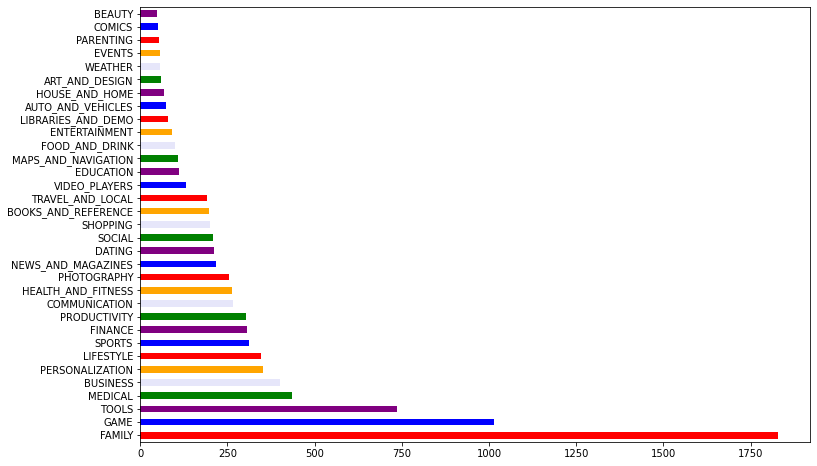

In [75]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8), color=['red', 'blue', 'purple', 'green', 'lavender', 'orange'])

c:\users\riyar\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

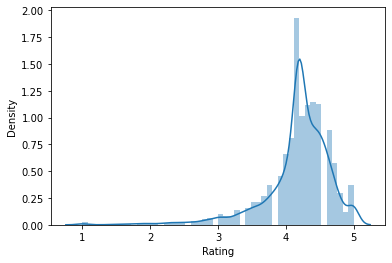

In [13]:
sns.distplot(df.Rating)

([<matplotlib.patches.Wedge at 0x22f6272b160>,
 [Text(-1.0663427222628654, 0.2700244408882676, 'Free'),
  Text(1.0663427096221079, -0.2700244908073729, 'Paid')],
 [Text(-0.5816414848706538, 0.14728605866632777, '92.1%'),
  Text(0.5816414779756952, -0.14728608589493067, '7.9%')])

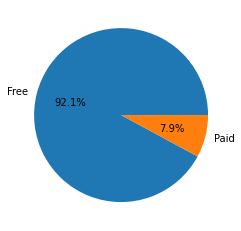

In [14]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

In [17]:
df_full = df[df.Rating == 5]
df_full = df_full[df.Reviews > 30]
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  15


<ipython-input-17-4c68bc4967c9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full = df_full[df.Reviews > 30]


c:\users\riyar\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genres', ylabel='count'>

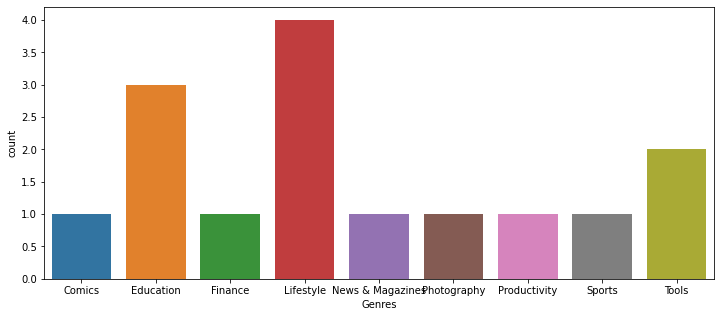

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

In [148]:
#df.to_csv("preprocesseddata.csv")

In [21]:
# Features selection
features = ['Category NUM', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating NUM']
X = df[features]
# Label selection
y = df.Rating
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)

#  1. LASSO (Least Absolute Shrinkage and Selection Operator) Regression

In [22]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
model.fit(train_X, train_y)
lasso_pred = model.predict(test_X)

# Evaluation of LASSO Regressor

In [23]:
# MAE
print("Mean absolute error: ", mean_absolute_error(lasso_pred, test_y))

# RMSE
print("Root mean squared error: ", sqrt(mean_squared_error(lasso_pred, test_y)))

# R-Squared
print("R-squared error: ", r2_score(lasso_pred, test_y))

Mean absolute error:  0.3304393886497114
Root mean squared error:  0.512105224013525
R-squared error:  -193.13730308653788


# 2. Ridge Regression

In [133]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(solver="sag", random_state=42, alpha=80)
ridge_model.fit(train_X, train_y)
ridge_pred = model.predict(test_X)

# Evaluation of Ridge Regressor

In [134]:
# MAE
print("Mean absolute error: ", mean_absolute_error(ridge_pred, test_y))

# RMSE
print("Root mean squared error: ", sqrt(mean_squared_error(ridge_pred, test_y)))

# R-Squared
print("R-squared error: ", r2_score(ridge_pred, test_y))

Mean absolute error:  0.32255783308075203
Root mean squared error:  0.48538482682939194
R-squared error:  -102.5006064748624


# 3. XGBoost (Extreme Gradient Boosting) Regression

In [141]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(train_X, train_y)
xg_pred = xg_reg.predict(test_X)

[16:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\riyar\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


# Evaluation of XGBoost Regressor

In [143]:
# MAE
print("Mean absolute error: ", mean_absolute_error(xg_pred, test_y))

# RMSE
print("Root mean squared error: ", sqrt(mean_squared_error(xg_pred, test_y)))

# R-Squared
print("R-squared error: ", r2_score(xg_pred, test_y))

Mean absolute error:  1.3330658303841774
Root mean squared error:  1.3920377452561412
R-squared error:  -34089594240676.184


# 4. Random forest regression

In [67]:
forest_model = RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=10)
forest_model.fit(train_X, train_y)
 # Pass values to get prediction for ratings
 # 1st value = Category NUM
 # 2nd value = Reviews
 # 3rd value = Size
 # 4th value = Installs
 # 5th value = Price
 # 6th value = Content Rating NUM

# For testing purpose
forest_pred = forest_model.predict(test_X)
# print(mean_absolute_error(forest_pred, test_y))

# Evaluation of Random Forest Regressor

In [68]:
# MAE
print("Mean absolute error: ", mean_absolute_error(forest_pred, test_y))

# RMSE
print("Root mean squared error: ", sqrt(mean_squared_error(forest_pred, test_y)))

# R-Squared
print("R-squared error: ", r2_score(forest_pred, test_y))

Mean absolute error:  0.3151134843821867
Root mean squared error:  0.48201598524204603
R-squared error:  -6.011945498423022


# Predicting app ratings

In [71]:
pred = forest_model.predict([[4,100000,20,1000000,5,1]])
print("Predicted rating: ",round(pred[0],1))

Predicted rating:  4.4


In [72]:
pred = forest_model.predict([[5,10000,10,1000000,0,2]])
print("Predicted rating: ",round(pred[0],1))

Predicted rating:  4.1
